# t-SNE 範例
(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: matplotlib in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: python-dateutil>=2.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: kiwisolver>=1.0.1 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: numpy>=1.11 in /Users/xiejialun/Library/Python/3.6/lib/python/site-packages (from matplotlib)
Requirement already up-to-date: six>=1.5 in /Users/xiejialun/Library/Pyth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

In [2]:
digits = datasets.load_digits(n_class = 4)
x = digits.data
y = digits.target

In [3]:
n_samples, n_features = x.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components = 2, random_state = 0, init = 'pca', learning_rate = 200, early_exaggeration=12.)

Computing t-SNE embedding


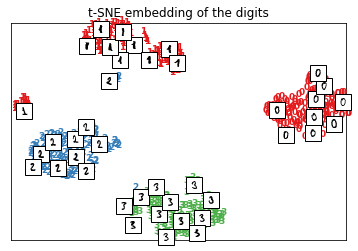

In [16]:
def plot_embedding(x, title=None):
    #Find the max vector(sum of elements in a vector) of x 
    x_min, x_max = np.min(x,0), np.max(x,0)
    x = (x-x_min) / (x_max-x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    
    for i in range(x.shape[0]):
        plt.text(x[i,0], x[i,1], str(y[i]), color = plt.cm.Set1(y[i]/10), fontdict = {'weight' : 'bold', 'size' : 9} )
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1,1]])
        for i in range(x.shape[0]):
            dist = np.sum((x[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [x[i]]]
            imagebox = offsetbox.AnnotationBbox(
                                offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r),
                                x[i])
            ax.add_artist(imagebox)

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

print("Computing t-SNE embedding")
x_tsne = tsne.fit_transform(x)

plot_embedding(x_tsne, "t-SNE embedding of the digits")
plt.show()

# 作業
用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [25]:
digits = datasets.load_digits(n_class = 6)
x = digits.data
y = digits.target

In [26]:
x_tsne = tsne.fit_transform(x)

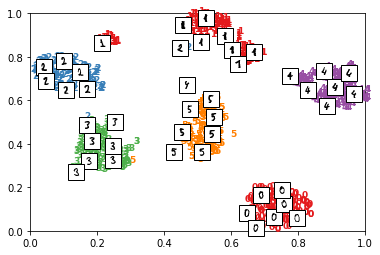

In [27]:
def embedding_plot(x, title = None):
    #Find the max vector(compare by sum of elements in a vector) of x 
    x_min, x_max = np.min(x,0), np.max(x,0)
    #Value Normalization
    x = (x-x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111) 
    for i in range(len(x)):
        #plot the data label by its tsne value, which is a 2d coordinate
        plt.text(x[i,0], x[i,1], str(y[i]), color = plt.cm.Set1(y[i]/10) ,
                fontdict = {'weight' : 'bold', 'size' : 9})
    
    #Check whether there is AnnotationBbox member in offsetbox
    if hasattr(offsetbox, 'AnnotationBbox'):
        #set a point to be the base position
        shown_images = np.array([[1,1]])
        for i in range(len(x)):
            #Calculate the distance between shown_images point and current point
            #np.sum(x,1) will addup all the elements of axis 1
            #In this case, it will calculate every distance between current point and every point in shown_images
            dist = np.sum((x[i] - shown_images) ** 2 , 1)
            if np.min(dist) < 4e-3 :
                #We dont want the annote the label image too close
                #So if there is a distance between current and points in shown_images too small, we dont draw
                continue
            #np.r_ will connect the shown_images and x[i] 
            #Which is like we record every point we drawn before
            shown_images = np.r_[shown_images, [x[i]]]
            #Draw the label image by its current position
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.binary), 
                x[i])
            ax.add_artist(imagebox)
        
        if title is not None:
            plt.title(title)

embedding_plot(x_tsne)
plt.show()